# Разработка системы распознавания предметов интерьера в потоковом видео
## Часть 5: Метрики

In [1]:
%matplotlib inline

#System
import os
import shutil

#Base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
from skimage.io import imread, imshow, imsave


#Seed
seed = 99
np.random.seed(seed)
random.seed(seed)

In [2]:
unet1 = pd.read_csv("callbacks/Unet_1_64_512_sigmoid_05.31_19-31/logger.csv")
unet2 = pd.read_csv("callbacks/Unet_2_64_512_sigmoid_06.01_00-13/logger.csv")
unet3 = pd.read_csv("callbacks/Unet_3_64_512_sigmoid_06.01_06-22/logger.csv")
#unet3_s = pd.read_csv("callbacks/Unet_3_64_512_softmax_06.01_13-50/logger.csv")
unet4 = pd.read_csv("callbacks/Unet_4_64_512_sigmoid_06.01_21-11/logger.csv")
unet5 = pd.read_csv("callbacks/Unet_5_64_512_sigmoid_06.02_06-06/logger.csv")

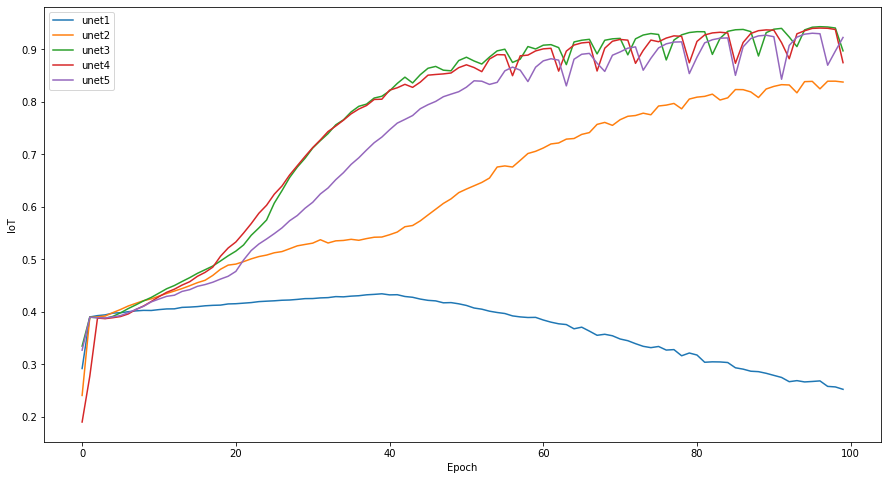

In [17]:
plt.figure(figsize=(15, 8))

plt.plot(unet1.epoch, unet1.jaccard_coef, label="unet1")
plt.plot(unet2.epoch, unet2.jaccard_coef, label="unet2")
plt.plot(unet3.epoch, unet3.jaccard_coef, label="unet3")
plt.plot(unet4.epoch, unet4.jaccard_coef, label="unet4")
plt.plot(unet5.epoch, unet5.jaccard_coef, label="unet5")


# plt.plot(unet1.epoch, unet1.val_jaccard_coef, label="Unet_1_64_512")
# plt.plot(unet2.epoch, unet2.val_jaccard_coef, label="Unet_2_64_512")
# plt.plot(unet3.epoch, unet3.val_jaccard_coef, label="Unet_3_64_512")
# plt.plot(unet4.epoch, unet4.val_jaccard_coef, label="Unet_4_64_512")
# plt.plot(unet5.epoch, unet5.val_jaccard_coef, label="Unet_5_64_512")

plt.xlabel("Epoch")
plt.ylabel("IoT")
plt.legend()

### Loss function

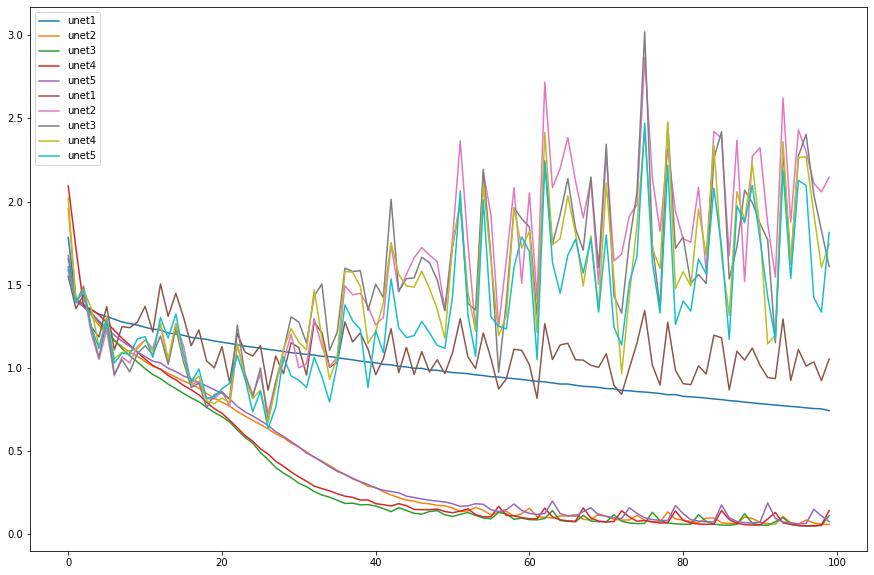

In [4]:
plt.figure(figsize=(15, 10))

plt.plot(unet1.epoch, unet1.loss, label="unet1")
plt.plot(unet2.epoch, unet2.loss, label="unet2")
plt.plot(unet3.epoch, unet3.loss, label="unet3")
plt.plot(unet4.epoch, unet4.loss, label="unet4")
plt.plot(unet5.epoch, unet5.loss, label="unet5")

plt.plot(unet1.epoch, unet1.val_loss, label="unet1")
plt.plot(unet2.epoch, unet2.val_loss, label="unet2")
plt.plot(unet3.epoch, unet3.val_loss, label="unet3")
plt.plot(unet4.epoch, unet4.val_loss, label="unet4")
plt.plot(unet5.epoch, unet5.val_loss, label="unet5")

plt.legend()

### Jaccard coef

### Зависимость времени работы от числа параметров модели

In [10]:
unet_1_time = float(open("callbacks/Unet_1_64_512_sigmoid_05.31_19-31/time.txt").read())
unet_2_time = float(open("callbacks/Unet_2_64_512_sigmoid_06.01_00-13/time.txt").read())
unet_3_time = float(open("callbacks/Unet_3_64_512_sigmoid_06.01_06-22/time.txt").read())
unet_4_time = float(open("callbacks/Unet_4_64_512_sigmoid_06.01_21-11/time.txt").read())
unet_5_time = float(open("callbacks/Unet_5_64_512_sigmoid_06.02_06-06/time.txt").read())

unet_1_param = float(open("callbacks/Unet_1_64_512_sigmoid_05.31_19-31/param_count.txt").read())
unet_2_param = float(open("callbacks/Unet_2_64_512_sigmoid_06.01_00-13/param_count.txt").read())
unet_3_param = float(open("callbacks/Unet_3_64_512_sigmoid_06.01_06-22/param_count.txt").read())
unet_4_param = float(open("callbacks/Unet_4_64_512_sigmoid_06.01_21-11/param_count.txt").read())
unet_5_param = float(open("callbacks/Unet_5_64_512_sigmoid_06.02_06-06/param_count.txt").read())

In [11]:
time = [unet_1_time, unet_2_time, unet_3_time, unet_4_time, unet_5_time]
param = [unet_1_param, unet_2_param, unet_3_param, unet_4_param, unet_5_param]

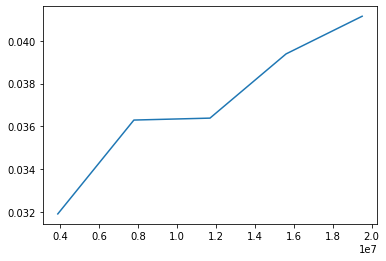

In [12]:
plt.plot(param, time)

In [16]:
param

[3875871.0, 7784863.0, 11693855.0, 15602847.0, 19511839.0]

In [20]:
[x*1000 for x in time]

[31.896546020270872,
 36.293186015964295,
 36.38359219391153,
 39.39174495128371,
 41.156102781710416]